# SVD test 

In [1]:
import numpy

In [2]:
X = numpy.array([
    [1,0],
    [0,1],
    [1,0],
    [0,1]
])

In [3]:
U,S,Vh = numpy.linalg.svd(X)

In [4]:
numpy.diag(S)

array([[1.41421356, 0.        ],
       [0.        , 1.41421356]])

# DMD : Example 1

In [1]:
import numpy
xi = numpy.linspace(-10,10,400)
t = numpy.linspace(0,4*numpy.pi,200)
dt = t[2] - t[1]
Xgrid ,T= numpy.meshgrid(xi,t)

First signal: 
$f_1 = sech(x +3) exp(i2.3t)$

Second signal: 
$f_2 = 2sech(x) tanh(x) exp(i2.8t)$

Mixed signal:

$f(x,t) = f_1(x,t) + f_2(x,t)$

In [2]:
f1 = 1/numpy.cosh(Xgrid+3) * (1*numpy.exp(1j*2.3*T))
f2 = (1/numpy.cosh(Xgrid) * numpy.tanh(Xgrid)) * (2*numpy.exp(1j*2.8*T))
f = f1 + f2

Visualise signals

<IPython.core.display.Javascript object>


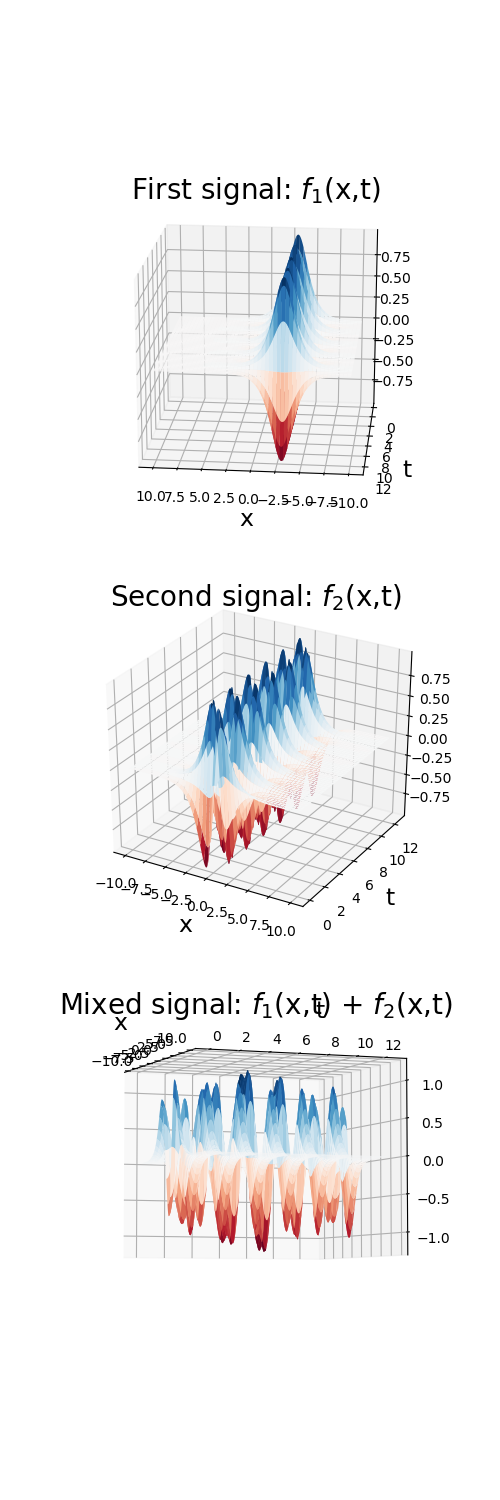

In [5]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,15))

#===============
# First signal
#===============
X = Xgrid
Y = T
Z = numpy.real(f1)

# set up the axes for the first plot
ax = fig.add_subplot(3, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.RdBu)

ax.set_title('First signal: $f_1$(x,t)', fontsize=20)
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('t', fontsize=17)

#===============
# Second signal
#===============
X = Xgrid
Y = T
Z = numpy.real(f2)

# set up the axes for the second plot
ax = fig.add_subplot(3, 1, 2, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.RdBu)

ax.set_title('Second signal: $f_2$(x,t)', fontsize=20)
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('t', fontsize=17)
#===============
# Mixed signal
#===============
X = Xgrid
Y = T
Z = numpy.real(f)

# set up the axes for the second plot
ax = fig.add_subplot(3, 1, 3, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.RdBu)

ax.set_title('Mixed signal: $f_1$(x,t) + $f_2$(x,t)', fontsize=20)
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('t', fontsize=17)

# fig.canvas.layout.width = '5in'
# fig.canvas.layout.height = '15in'

plt.show()

Perform DMD for dynamical system $X' = A X$

In [9]:
X = f.T

In [10]:
numpy.shape(X)

(400, 200)

In [11]:
X1 = X[0:-1]
X2 = X[1:]

Perform SVD decomposition

$X = U \Sigma V^*$

In [12]:
U, S, Vh = numpy.linalg.svd(X1)
S = numpy.diag(S)
V = numpy.conjugate(Vh)

Fix rank for truncation

Original ranks for all matrices

In [13]:
list(map(numpy.shape, [X1,U,S,V]))

[(399, 200), (399, 399), (200, 200), (200, 200)]

Apply rank-truncation to rank $r = 2$

In [15]:
r = 2
Ur = U[:, 0:r]
Sr = S[0:r,0:r]
Vr = V[:, 0:r]

In [16]:
list(map(numpy.shape, [Ur,Sr,Vr]))

[(399, 2), (2, 2), (200, 2)]

Leading non-zero eigenvalues

In [17]:
Sr

array([[112.80805587,   0.        ],
       [  0.        ,  76.56523703]])

Construct reduced dynamic 

Original dynamics

$A = X' V \Sigma^{-1} U^*$

Reduced dynamics projected onto PCs (i.e., columns of $U$ matrix)

$\tilde{A} = U^* A U = U^* X' V \Sigma^{-1}$

In [18]:
list(map(numpy.shape, [numpy.conjugate(Ur.T),X2,Vr,numpy.linalg.inv(Sr)])) # Check correct matrix shapes

[(2, 399), (399, 200), (200, 2), (2, 2)]

In [19]:
Ar = reduce(numpy.dot, [numpy.conjugate(Ur.T),X2,Vr,numpy.linalg.inv(Sr)])

NameError: name 'reduce' is not defined

In [219]:
Ar

array([[ 0.01196145+0.00660166j,  0.02117306-0.01079608j],
       [-0.03404628-0.02511327j,  0.00472864-0.03727567j]])

Spectral decomposition of reduced dynamics

In [234]:
D, W = numpy.linalg.eig(Ar) # eigenvalues and eigenvectors

DMD modes

In [237]:
list(map(numpy.shape, [X2, Vr, numpy.linalg.inv(Sr), W]))

[(399, 200), (200, 2), (2, 2), (2, 2)]

In [239]:
Phi = reduce(numpy.dot, [X2, Vr, numpy.linalg.inv(Sr), W])

In [244]:
numpy.shape(Phi)

(399, 2)

DMD spectra

In [261]:
Lambda = numpy.diag(D)
Omega = numpy.diag(numpy.log(D)/dt)

In [262]:
Omega

array([[-58.84962125+19.37951369j,   0.         +0.j        ],
       [  0.         +0.j        , -46.16075382-22.40616929j]])

## PCA computed via SVD

In [270]:
pc1 = U[0] # First PCA mode
pc2 = U[1] # Second PCA mode
pc1_temporal = V[0] # Temporal evolution of PC1
pc2_temporal = V[1] # Temporal evolution of PC1

## Fast ICA computation

Example taken from 

https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py


<IPython.core.display.Javascript object>


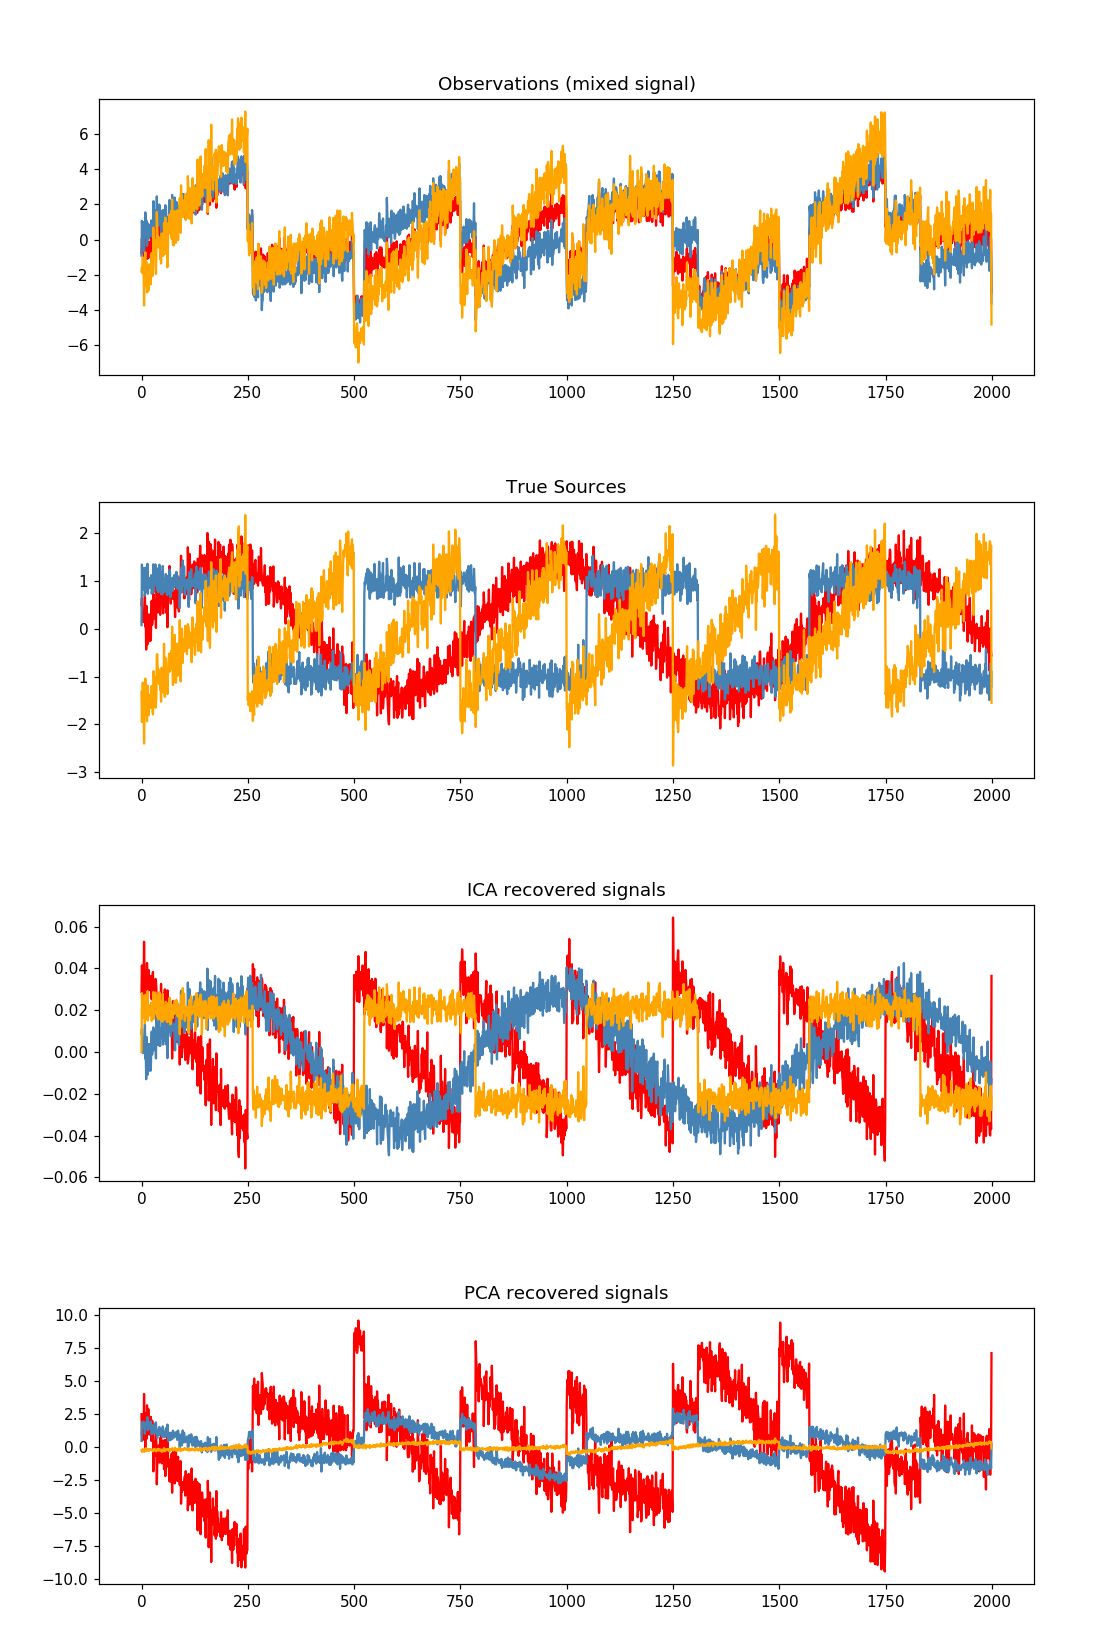

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure(figsize=(10,15))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# DMD: Application to MD simulation

Protein structure : Test with own protein simulations

DMD Figure

In [1]:
import numpy

In [15]:
N = 1000 # Number of datapoints

x_min = 0
x_max = 10
x = numpy.linspace(x_min,x_max,N)

a = 4
b = 0.1
y = a*x + b + numpy.random.randn(N) 

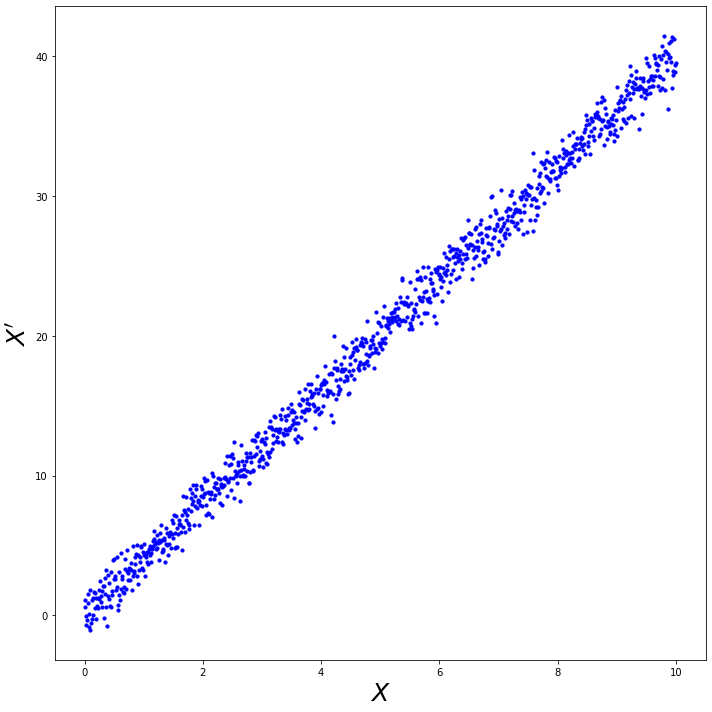

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

plt.scatter(x,y,s=10,c='blue')

plt.xlabel("$X$", fontsize=25)
plt.ylabel("$X'$", fontsize=25)

fig.tight_layout()
plt.show()

# Moore-Penrose pseudo-inverse

Defintion 

As generalisation of invertible square matrices

\begin{equation}
A \in \mathbb{R}^{n \times n}
\end{equation}

$A A^{-1} = A^{-1} A = I_n$

## Computation (via SVD)

First, consider the following property of the pseudoinverse for a product of matrices

If $\mathbf{A} = \mathbf{B}\mathbf{C}$, then $\mathbf{A}^+ = \mathbf{C}^+ \mathbf{B}^+$

Then, form the SVD, if $\mathbf{A} = U \Sigma V^*$, then

\begin{align}
\mathbf{A}^+ &= (V^*)^+ \Sigma^+ U^+ \\
\mathbf{A}^+ &= V \Sigma^+ U^*
\end{align}

Since $U$ and $V$ are *unitary* (i.e., they have linearly independent columns, then both satisfy: $UU^* = VV^* = I$), then we have

$U^+ = (U^* U)^{-1} U^* = U^*$

$(V^*)^+ = (V^*)^* (V^* V)^{-1} = V$

where $\Sigma_r^+ = \Sigma_r^{-1}$, since $\Sigma_r$ is invertible.